In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
iris = load_iris()

columns = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
irisDF = pd.DataFrame(iris.data, columns=columns)
irisDF['target'] = iris.target

print(irisDF.shape)
irisDF.head(3)

(150, 5)


,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [4]:
#정규화 (평균0,분산1)
from sklearn.preprocessing import StandardScaler
iris_scaled = StandardScaler().fit_transform(irisDF)

In [5]:
#PCA 수행(n_compopnets = 2)
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)

#fit()과 transform()을 호출하여 PCA변환 데이터 반환
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)

#차원이 2차원으로 변환된 것 확인
print(iris_pca.shape)

(150, 2)


In [6]:
# PCA 변환된 데이터의 컬럼명을 각각 pca_component_1, pca_component_2로 명명
pca_columns = ["pca_component_1", "pca_component_2"]

irisDF_pca = pd.DataFrame(iris_pca, columns= pca_columns)
irisDF_pca["target"] = iris.target
irisDF_pca.head(3)

,pca_component_1,pca_component_2,target
0,-2.576120,0.474499,0
1,-2.415322,-0.678092,0
2,-2.659333,-0.348282,0


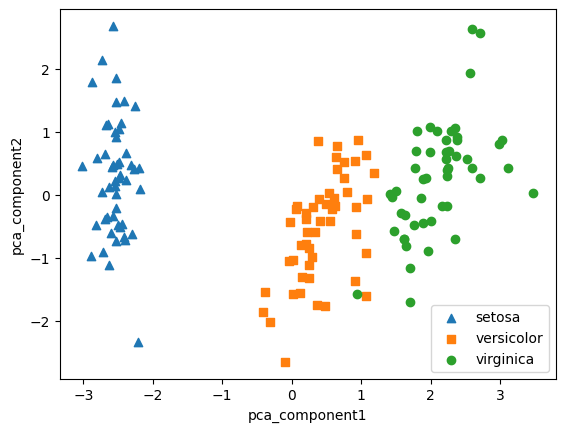

In [8]:
#setosa 세모, versicolor를 네모, virginica 동그라미
markers = ['^','s','o']
#pca_component_1을 x축, pc_component_2
for i, marker in enumerate(markers):
    x_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_1']
    y_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker = marker, label = iris.target_names[i])

plt.legend()
plt.xlabel('pca_component1')
plt.ylabel('pca_component2')
plt.show()

In [11]:
#각 PCA Component별 변동성 비율
print(pca.explained_variance_ratio_)

[0.76740358 0.18282727]


In [12]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=4).fit(pca_X, iris.target)
clf.score(pca_X, iris.target)
1:03
#pca로 차원축소한 데이터
pca_X = irisDF_pca[['pca_component_1', 'pca_component_2']]
scores_pca = cross_val_score(rcf, pca_X, iris.target, scoring='accuracy', cv=3)
print(scores_pca)
print(np.mean(scores_pca))

SyntaxError: leading zeros in decimal integer literals are not permitted; use an 0o prefix for octal integers (1955784355.py, line 4)

In [13]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=4).fit(pca_X, iris.target)
clf.score(pca_X, iris.target)
1:10
#pca로 차원축소한 데이터
pca_X = irisDF_pca[['pca_component_1', 'pca_component_2']]
scores_pca = cross_val_score(rcf, pca_X, iris.target, scoring='accuracy', cv=3)
print(scores_pca)
print(np.mean(scores_pca))

SyntaxError: illegal target for annotation (498610863.py, line 4)

In [7]:
import pandas as pd
df = pd.read_csv("../csv/UCI_Credit_Card.csv")

In [8]:
print(df.shape)

(30000, 25)


In [9]:
df.head(3)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0


In [10]:
#컬럼명 변경
df.rename(columns = {'PAY_0' : 'PAY_1', 'default.payment.next.month' : 'default'}, inplace = True)


In [11]:
df.head(3)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0


In [12]:

# 속성과 클래스로 데이터 분류
y_target = df['default']
X_features = df.drop('default', axis =1)

y_target.value_counts()


0    23364
1     6636
Name: default, dtype: int64

In [13]:
X_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         30000 non-null  int64  
 1   LIMIT_BAL  30000 non-null  float64
 2   SEX        30000 non-null  int64  
 3   EDUCATION  30000 non-null  int64  
 4   MARRIAGE   30000 non-null  int64  
 5   AGE        30000 non-null  int64  
 6   PAY_1      30000 non-null  int64  
 7   PAY_2      30000 non-null  int64  
 8   PAY_3      30000 non-null  int64  
 9   PAY_4      30000 non-null  int64  
 10  PAY_5      30000 non-null  int64  
 11  PAY_6      30000 non-null  int64  
 12  BILL_AMT1  30000 non-null  float64
 13  BILL_AMT2  30000 non-null  float64
 14  BILL_AMT3  30000 non-null  float64
 15  BILL_AMT4  30000 non-null  float64
 16  BILL_AMT5  30000 non-null  float64
 17  BILL_AMT6  30000 non-null  float64
 18  PAY_AMT1   30000 non-null  float64
 19  PAY_AMT2   30000 non-null  float64
 20  PAY_AM

<AxesSubplot: >

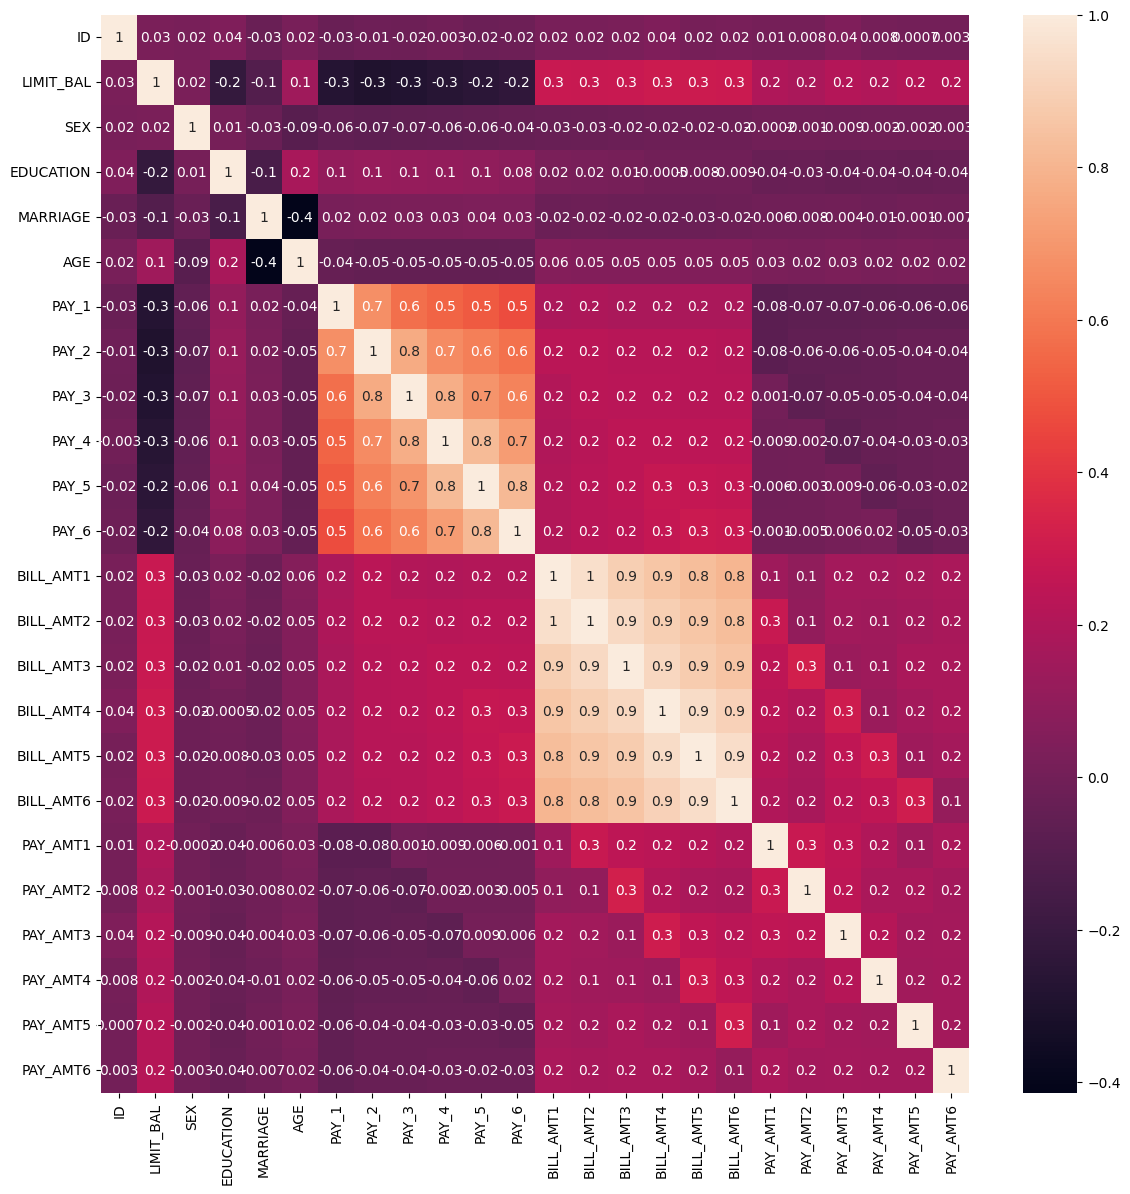

In [14]:
#히트맵으로 피처 간 상관관계 시각화
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

corr = X_features.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr, annot=True, fmt = '.1g')

In [15]:
#일부 피처들 PCA 변환 (n_components = 2)
#일부 상관도가 높은 피처들(BILL_AMT1-6)을 PCA(n_components =2) 변환 후 변동성 확인

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#BILL_AMT1 - BILL_AMT6 까지 6개의 속성명 생성
cols_bill = ['BILL_AMT' + str(i) for i in range(1,7)]
print ('대상 속성명 : ', cols_bill)

#2개의 PCA속성을 가진 PCA객체 생성하고, explained_variance_ratio_계산 위해 fit()호출
scaler = StandardScaler()
df_cols_scaled = scaler.fit_transform(X_features[cols_bill])
pca = PCA(n_components=2)
pca.fit(df_cols_scaled)

print('PCA Component별 변동성 :', pca.explained_variance_ratio_)

대상 속성명 :  ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
PCA Component별 변동성 : [0.90555253 0.0509867 ]


In [17]:
#전체 원본데이터와 PCA 변환된 데이터 간 랜덤 포레스트 예측 성능 비교
#1. 원본 데이터
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf = RandomForestClassifier(n_estimators=300, random_state=156)

#원본 데이터일 때 랜덤 포레스트 예측 성능
scores = cross_val_score(rcf, X_features, y_target, scoring='accuracy', cv=3)

print('CV=3 인 경우 개별 Fold세트별 정확도: ', scores)
print('평균 정확도:{0:.4f}'.format(np.mean(scores)))

CV=3 인 경우 개별 Fold세트별 정확도:  [0.257  0.8209 0.784 ]
평균 정확도:0.6206
